# Lick model

### This notebook is an initial attempt to model trains of licks when rats are choosing between two solutions (e.g. protein and carbohydrate)

In [35]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

%matplotlib inline

# Run notebook that extracts data from medfiles
%run extractlicks.ipynb

In [218]:
# Initializes the system and system variables

System = {}
System['PP'] = 0.75
System['tau'] = 10
System['licksinburst'] = 0

In [219]:
def update_func(System, licks):
    pp = System['PP']
    tau = System['tau']
    x = System['licksinburst']
    
    if licks[-1] == 0:
            if random.random() < pp:
                licks.append(2)            
            else:
                licks.append(1)
            System['licksinburst'] = x+1
    else:
        p_cont = math.exp(-x*(1/tau))
        if random.random() < p_cont:           
            licks.append(licks[-1])
            System['licksinburst'] = x+1
        else:
            licks.append(0)
            System['licksinburst'] = 0  
            

In [220]:
# Initializes the arrays to store data

licks = [0]

for i in range(1, 1000):
    update_func(System, licks)
    # print(x, licks)

# print(licks)
print(np.mean([x-1 for x in licks if x>0]))

0.7478152309612984


In [10]:
licks = test1_data_NR['IPP3.2']

In [25]:
# Create running average

N = 12
cumsum, licks_smooth = [0], []

for i, x in enumerate(licks, 1):
    cumsum.append(cumsum[i-1] + x)
    if i>=N:
        moving_ave = (cumsum[i] - cumsum[i-N])/N
        #can do stuff with moving_ave here
        licks_smooth.append(moving_ave)
        

In [11]:
# Code to calculate burst data
burstarray = []

tmp = []
for i, x in enumerate(licks):
    if x == 0:
        burstarray.append(tmp)
        tmp = []
    else:
        tmp.append(x)
        

burstlength1 = [len(x) for x in burstarray[1:] if x[0]==1]
burstlength2 = [len(x) for x in burstarray[1:] if x[0]==2]

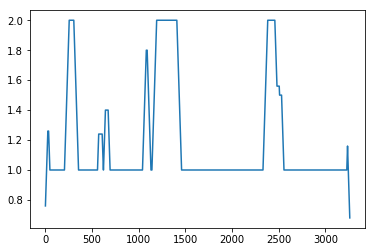

In [32]:

only_licks = [x for x in licks if x > 0]
window = 50
avg_mask = np.ones(window) / window
y_avg = np.convolve(only_licks, avg_mask, 'same')
len(only_licks)

plt.plot(y_avg)

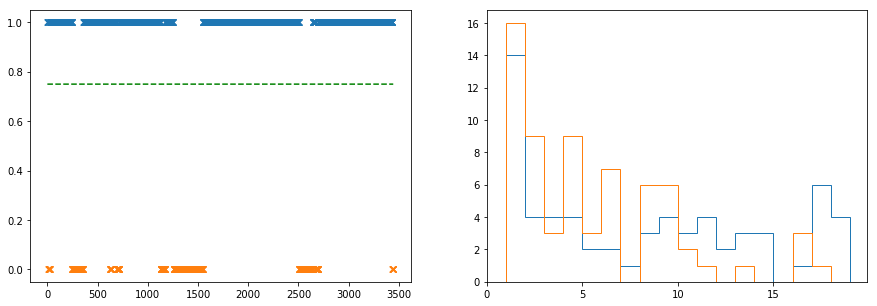

In [33]:
f, ax = plt.subplots(figsize=(15,5), ncols=2)

x1 = [i for i, x in enumerate(licks) if x == 1]
x2 = [i for i, x in enumerate(licks) if x == 2]

y1 = [1]*len(x1)
y2 = [0]*len(x2)

ax[0].plot(x1,y1, 'x')
ax[0].plot(x2,y2, 'x')
ax[0].plot(np.arange(0,len(licks)),[System['PP']]*len(licks), 'g', linestyle='dashed')


bins = np.arange(1,20)
ax[1].hist(burstlength1, bins=bins, histtype='step')
ax[1].hist(burstlength2, bins=bins, histtype='step')
ax[1].set_xticks([0, 5, 10, 15])


AxesSubplot(0.125,0.125;0.775x0.755)


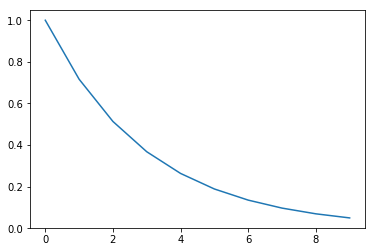

In [68]:
f, ax = plt.subplots()

lick_array = np.arange(0,10)
k=3
next_lick_p = [math.exp(-x*(1/k)) for x in lick_array]

ax.plot(lick_array, next_lick_p)



In [1]:
%who_ls


[]

[0 1 1 ... 1 1 1]
4775
[0 2 2 ... 2 2 2]
4638
[0 2 2 ... 1 1 1]
1854
[0 1 1 ... 1 0 1]
1466
[0 1 0 ... 1 1 1]
513
[0 1 1 ... 0 1 1]
3015


In [7]:
%who_ls dict

['System', 'test1_data_NR', 'test1_data_PR']